# DataCat EOtest Results

Notebook to access eotest results using datacat-utilities, includes focal plane data.

## Imports 

In [26]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
datacat_path = '/home/elp25/repos/datacat-utilities/python'

In [3]:
sys.path.insert(0, datacat_path)

In [4]:
from get_EO_analysis_results import get_EO_analysis_results
from exploreFocalPlane import exploreFocalPlane
from exploreRaft import exploreRaft
from eTraveler.clientAPI.connection import Connection
from get_steps_schema import get_steps_schema

Warning, Data Catalog not available
No module named 'datacat'


## Explore Raft and Explore Focal Plane

Define four objects, to explore results for both prod and dev and both raft-level and focal-plane-level data.

In [5]:
eFP_Prod = exploreFocalPlane(db="Prod", prodServer="Prod")
eR_Prod = exploreRaft(db="Prod", prodServer="Prod")
get_EO_Prod = get_EO_analysis_results(db="Prod", server="Prod")
get_EO_Dev = get_EO_analysis_results(db="Dev", server="Dev")

## Focal Plane Results Example 

Example to access the results of a BOT run.

eTraveler results: https://lsst-camera.slac.stanford.edu/DataPortal/run.jsp?run=6774D&dataSourceMode=Dev 

Define the run we want to look at. For a list of runs from data with nine science and four corner rafts look at: 
https://confluence.slac.stanford.edu/display/LSSTCAM/Nine+Science+and+Four+Corner+Raft+EO+Runs

In [6]:
run = '6774D'

### Extract the test results.

In [7]:
raft_list, data = get_EO_Prod.get_tests(site_type="I&T-BOT", run=run)

In [8]:
res = get_EO_Prod.get_all_results(data=data, device=raft_list)

### Get a list of the available tests.

In [9]:
get_step = get_steps_schema()
avail_tests = get_step.get_test_info(runData=data)

In [10]:
print(avail_tests.keys())

odict_keys(['psf_sigma', 'gain_error', 'gain', 'total_noise', 'system_noise', 'read_noise'])


Plot results of various tests. (Note, datacat-utilities does not use pandas, for this example we are tacking on some usage of it. 

In [11]:
# Each row represents the value of the test quantity for one amplifier
res.keys()

odict_keys(['gain', 'gain_error', 'psf_sigma', 'read_noise', 'system_noise', 'total_noise'])

In [12]:
rafts = res['gain'].keys()

### Store results as a dataframe

In [16]:
# Dataframe in which each row represents the value of the test quantity for one amplifier 

def datacatresults_to_dataframe(datacat_results,avail_tests,rafts):
    res_df = {}
    sensor_list = []
    test_list = []
    amp_quants_list = []
    for test in avail_tests:
        for raft in rafts:
            sensors = res[test][raft].keys()
            for sensor in sensors:
                quants = res[test][raft][sensor]
                amp_quants_list.extend(quants)
                sensor_list.extend([raft+'-'+sensor]*len(quants))
                test_list.extend([test]*len(quants))
    res_df['sensor'] = sensor_list
    res_df['test'] = test_list
    res_df['quant'] = amp_quants_list
    res_df = pd.DataFrame(res_df)
    return res_df

In [17]:
res_df = datacatresults_to_dataframe(res,avail_tests,rafts)

### FP Results Plots 

In [19]:
res_df.head()

,sensor,test,quant
0,R01-S00,psf_sigma,4.20
1,R01-S00,psf_sigma,3.40
2,R01-S00,psf_sigma,2.44
3,R01-S00,psf_sigma,4.68
4,R01-S00,psf_sigma,3.72


In [20]:
test = 'psf_sigma'
psf_sigma = res_df.query('test==@test')

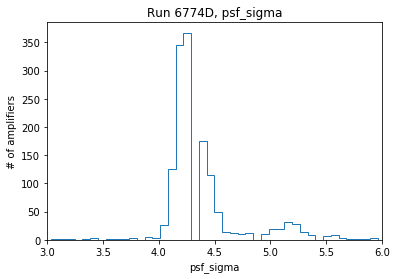

In [32]:
plt.hist(psf_sigma['quant'],bins=100,histtype='step')
plt.title('Run '+run+', '+test)
plt.xlim(3.0,6)
plt.xlabel('psf_sigma')
plt.ylabel('# of amplifiers')
plt.show()

In [34]:
test = 'gain'
gain = res_df.query('test==@test')

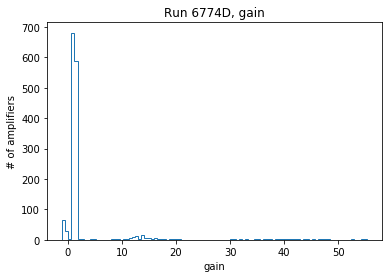

In [37]:
plt.hist(gain['quant'],bins=100,histtype='step')
plt.title('Run '+run+', '+test)
plt.xlabel('gain')
plt.ylabel('# of amplifiers')
plt.show()

In [46]:
avail_tests

OrderedDict([('psf_sigma', ['fe55_analysis_BOT', 'fe55_BOT_analysis']),
             ('gain_error', ['fe55_analysis_BOT', 'fe55_BOT_analysis']),
             ('gain', ['fe55_analysis_BOT', 'fe55_BOT_analysis']),
             ('total_noise', ['read_noise_BOT', 'read_noise_BOT']),
             ('system_noise', ['read_noise_BOT', 'read_noise_BOT']),
             ('read_noise', ['read_noise_BOT', 'read_noise_BOT'])])

In [47]:
test = 'gain'
test_err = 'gain_error'
gain = res_df.query('test==@test')
gain_err = res_df.query('test==@test_err')

(0, 0.04)

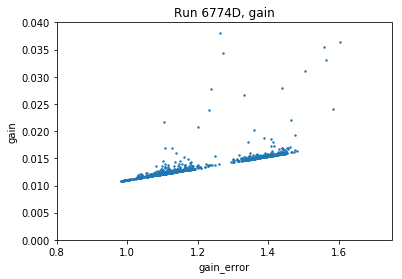

In [68]:
plt.scatter(gain['quant'],gain_err['quant'],s=2.0)
plt.xlabel('gain_error')
plt.ylabel('gain')
plt.title('Run '+run+', '+test)
plt.xlim(0.8,1.75)
plt.ylim(0,0.04)

(0.01, 0.02)

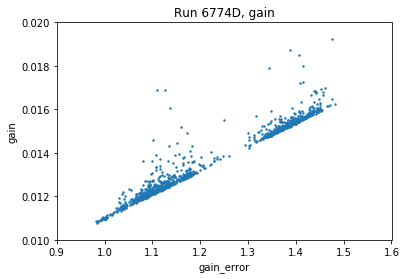

In [70]:
plt.scatter(gain['quant'],gain_err['quant'],s=2.0)
plt.xlabel('gain_error')
plt.ylabel('gain')
plt.title('Run '+run+', '+test)
plt.xlim(0.9,1.6)
plt.ylim(0.01,0.02)